# 유방암 분류

In [2]:
## 필요모듈 import
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
## 데이터 로드
data = load_breast_cancer()

## 지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

1. Feature Data 지정하기  
2. Label Data 지정하기  
3. Target Names 출력해 보기  
4. 데이터 Describe 해 보기  

In [4]:
##데이터 DESCRIPTION 
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
##편리한 처리를 위해 DataFrame으로 변환
import pandas as pd
df = pd.concat([pd.DataFrame(data.data, columns=data.feature_names), pd.DataFrame(data.target, columns=['target'])], axis=1)


In [6]:
##결측치 제거 
df = df.dropna().reset_index(drop=True)

['malignant' 'benign']
데이터의 갯수는 569개 입니다.

데이터의 label분포는 
 1    357
0    212
Name: target, dtype: int64 입니다.



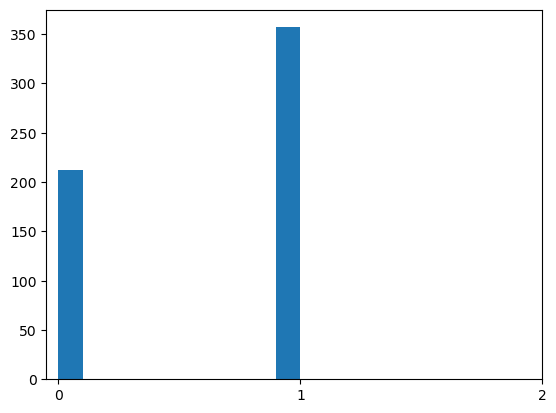

In [7]:
## print(data count)

print(data.target_names)

print(f"데이터의 갯수는 {len(df)}개 입니다.\n")

## print(label count)
print(f"데이터의 label분포는 \n {df['target'].value_counts()} 입니다.\n")

plt.hist(df['target'])
plt.xticks([0,1,2])
plt.show()

<AxesSubplot:>

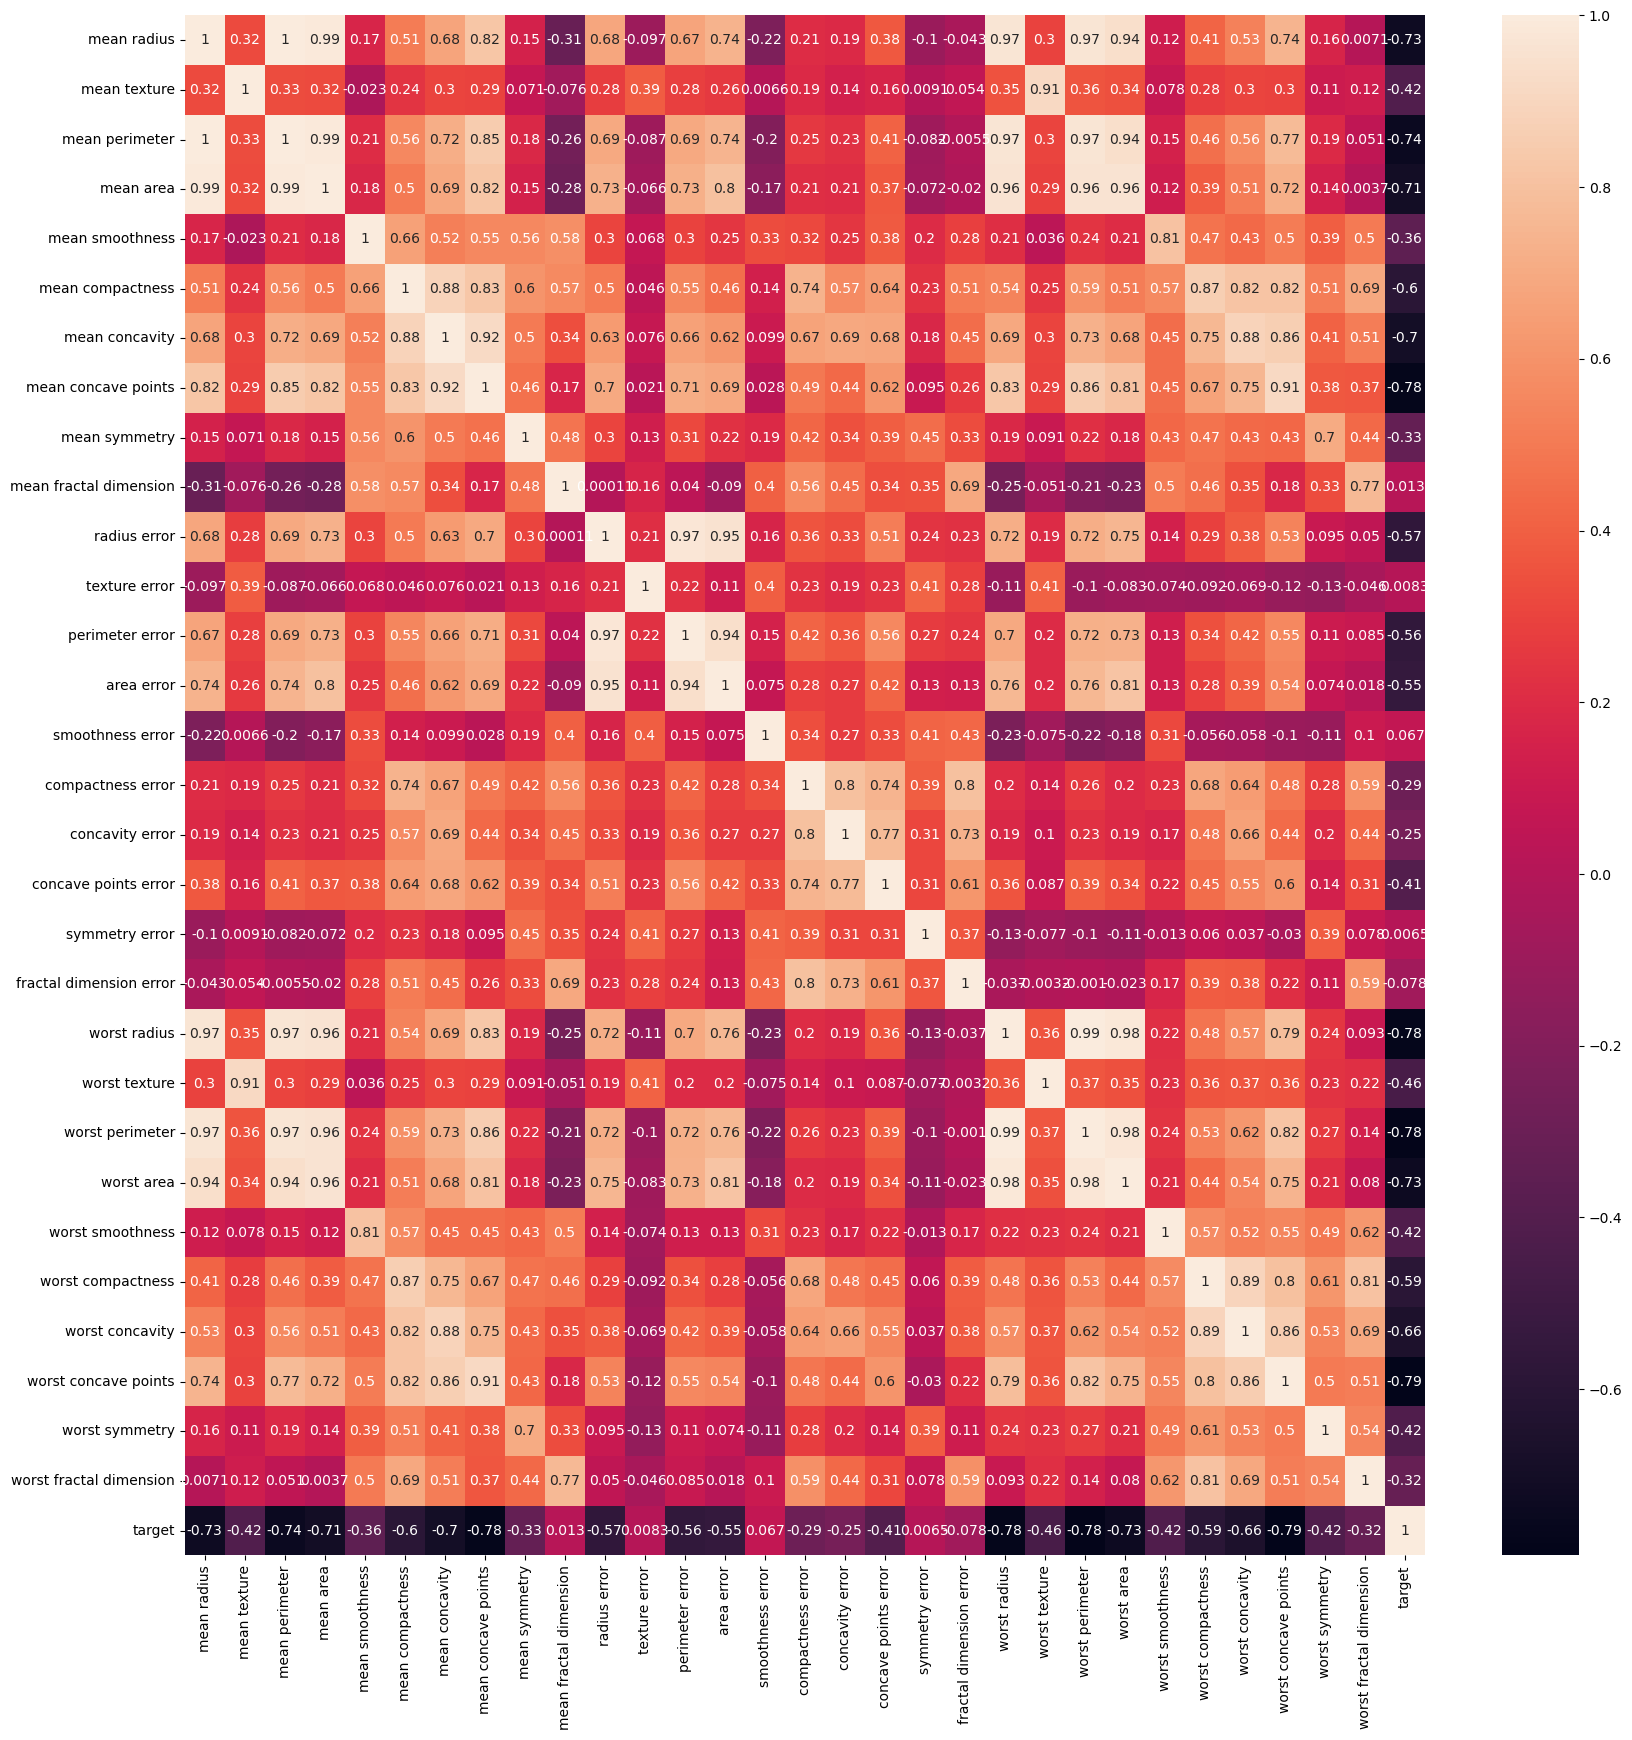

In [9]:
## 상관관계 분석 Heatmap 시작화 Target 변수와의 상관관계 다중공선
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [10]:
## Target과 관련이 높은 featrue 확인
df.corr()['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [11]:
df.iloc[:,:-1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
## VIF 공분산성 확인해보기 변수선택으로
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as  pd 
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(
    df.iloc[:,:-1].values, i) for i in range(df.iloc[:,:-1].shape[1])]
vif["features"] = df.iloc[:,:-1].columns
vif.sort_values(by='VIF_Factor', ascending=True)

,VIF_Factor,features
11,24.675367,texture error
14,26.170243,smoothness error
19,27.532631,fractal dimension error
16,33.244099,concavity error
18,37.176452,symmetry error
15,44.919651,compactness error
17,53.698656,concave points error
13,72.466468,area error
26,86.310362,worst concavity
25,132.884276,worst compactness


In [13]:
###train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['target'], test_size=0.2, random_state=7)

In [21]:
##데이터 정규화 해보기 
from sklearn.preprocessing import RobustScaler

def get_values(value):
    return value.values.reshape(-1, 1)

for col in X_train.columns:
    scaler = RobustScaler()
    X_train[col] = scaler.fit_transform(get_values(X_train[col]))
    X_test[col] = scaler.transform(get_values(X_test[col]))

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [23]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))



              precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.99      0.96      0.97        74

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [24]:
model = SVC()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.99      0.99        74

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [25]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90        40
           1       0.97      0.92      0.94        74

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



In [26]:
model = SGDClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [27]:
model = LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

